# The Purpose of Data Analsis:

- The purpose of the data analysis for SussexBudgetProductions is to formulate a strategic and actionable plan for their next movie production.

# Cleaning and Wrangling the data:
- loading data
- dtypes checking
- data duplication 
- null / none values

- new columns

#### Load the movie data and import the necessary Python libraries.

In [45]:
#standard imports for when working with pandas
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.diagnostic import lilliefors
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from scipy.stats import ks_2samp
from scipy.stats import normaltest
import seaborn as sns
import numpy as np 
import pandas as pd

#read the movie metadata file into a dataframe in pandas.
myfile = 'movie_metadata.csv'
df = pd.read_csv(myfile,index_col=None)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### dtypes checking

In [46]:
df.select_dtypes(float).columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio'],
      dtype='object')

In [47]:
df.select_dtypes(object).columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')


- It appears that all columns are of their correct data types.

#### data duplication 
45 duplicated values found in the dataset. 

To maintain analysis integrity, only the first occurrence of each duplicate will be kept.

In [48]:
df.duplicated().sum()

45

In [49]:
df.drop_duplicates(inplace=True,keep='first')
df.duplicated().sum()

0

#### null values

missing values were removed to ensure data integrity after consulting with the data collector. 

The dataset initially had 4,998 rows, but now there are 3,722 rows remaining.

In [50]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

#### new columns

- Add a `profit` column by subtracting `budget` from `gross` to assess each movie's financial performance directly.

- Convert categorical data into numerical form using label encoding for easier plotting, analysis, and statistical processes like testing and bootstrapping.

In [53]:
df['profit'] = df['gross'] - df['budget']

In [54]:
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded= df_exploded.explode('genres')
le = LabelEncoder()
# Fit the label encoder and transform the 'genres' column
df_exploded['genres_encoded'] = le.fit_transform(df_exploded['genres'])
df_exploded['language_encoded'] = le.fit_transform(df_exploded['language'])
df_exploded['country_encoded'] = le.fit_transform(df_exploded['country'])
df_exploded['actor_1_name_encoded'] = le.fit_transform(df_exploded['actor_1_name'])
df_exploded['actor_2_name_encoded'] = le.fit_transform(df_exploded['actor_2_name'])
df_exploded['actor_3_name_encoded'] = le.fit_transform(df_exploded['actor_3_name'])
df_exploded['director_name_encoded'] = le.fit_transform(df_exploded['director_name'])
df_exploded['content_rating_encoded'] = le.fit_transform(df_exploded['content_rating'])

# Exploratory Data Analysis
- outlier detection
- histplot & ECDF
- KS test
- histplot & boxplot
- boostraping
- T-test

#### outliers

- Outliers have been identified in the dataset. However, we will not remove these outliers, as they may be a result of natural variation. It is important to recognize that outliers are not necessarily errors or anomalies; in some cases, they can provide valuable insights into the data 

In [55]:
def count_outliers_iqr(data):
    outlier_counts = pd.Series(index=data.columns)
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:  # Check if the column is numeric
            # Calculate Q1, Q3, and IQR
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1

            # Determine the bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count outliers in the column
            outlier_counts[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    return outlier_counts

count_outliers_iqr(df)


color                          NaN
director_name                  NaN
num_critic_for_reviews       148.0
duration                     124.0
director_facebook_likes      394.0
actor_3_facebook_likes       167.0
actor_2_name                   NaN
actor_1_facebook_likes       118.0
gross                        278.0
genres                         NaN
actor_1_name                   NaN
movie_title                    NaN
num_voted_users              310.0
cast_total_facebook_likes    224.0
actor_3_name                   NaN
facenumber_in_poster         152.0
plot_keywords                  NaN
movie_imdb_link                NaN
num_user_for_reviews         289.0
language                       NaN
country                        NaN
content_rating                 NaN
budget                       271.0
title_year                   139.0
actor_2_facebook_likes       597.0
imdb_score                    85.0
aspect_ratio                   1.0
movie_facebook_likes         401.0
profit              

For this stage, our goal is to separate the data into high profit and low profit groups to see if they are significantly different at the 0.1% significance level. 

To do that, the median in `profit` will be applied as the threshold since we want to avoid outlier skewness in our analysis.

In [56]:
# Calculate the median of the 'profit' column to set as the threshold
quality_thresh = df['profit'].median()

# Split the dataset into high profit and low profit groups based on the threshold
df_profit_h = df_exploded[df_exploded['profit'] > quality_thresh]
df_profit_l = df_exploded[df_exploded['profit'] <= quality_thresh]

# Select only numerical columns for the high profit group .This is typically done to facilitate numerical analysis
df_profit_h = df_profit_h.select_dtypes(include=[np.number])
df_profit_l = df_profit_l.select_dtypes(include=[np.number])

# Remove the 'profit' column from the high profit group dataset.
df_profit_h.drop('profit', axis=1, inplace=True)
df_profit_l.drop('profit', axis=1, inplace=True)


For each feature in the dataset, excluding profit, plot
1. The histogram and ECDFs resulting from the df_profit_h and df_profit_l dataset.


\begin{align*}
    D = \sup\limits_x |\hat{F}_{X_1}(x) - \hat{F}_{X_2}(x)|
\end{align*}

In the KS test, we compare two samples to detect differences in their distributions. The KS statistic (D) measures the largest gap between their ECDFs.

 A larger D indicates likely differences between the samples, helping us identify factors associated with higher profits.

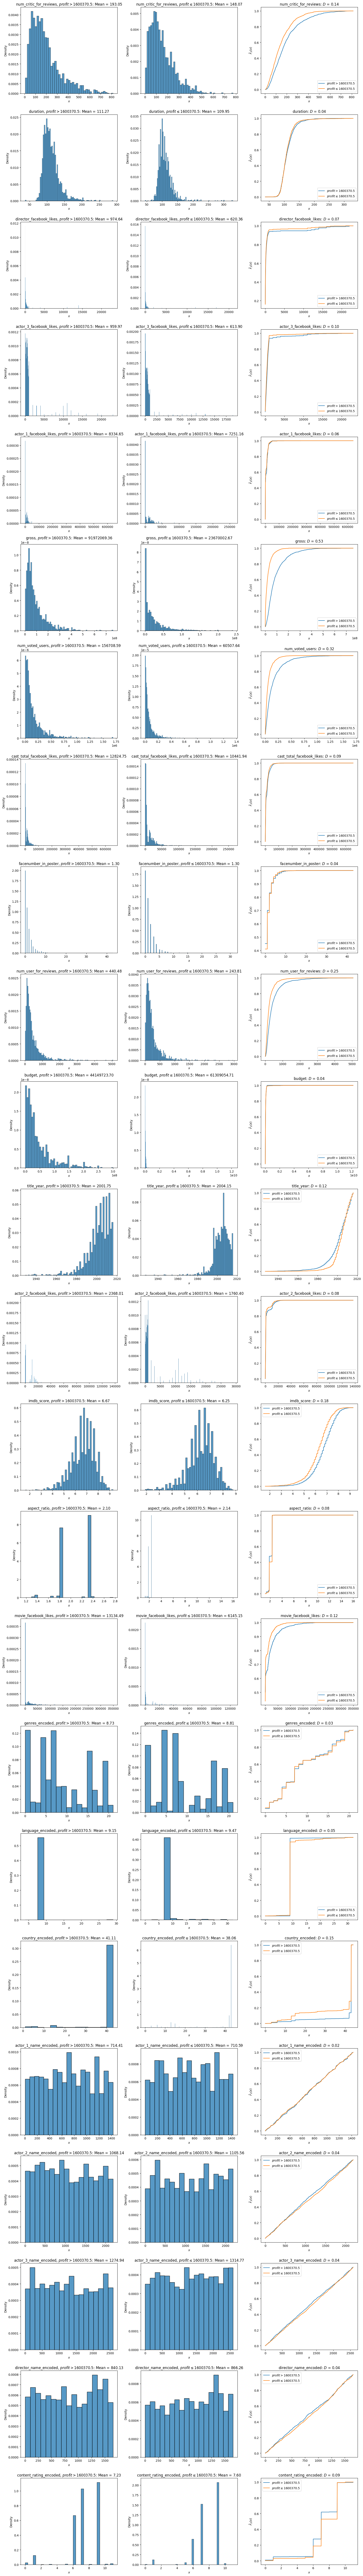

In [57]:
# Define function for plotting histograms
def plot_histogram(ax, data, column, title, xlabel):
    sns.histplot(data=data, ax=ax, x=column, line_kws={"lw": 2}, stat="density")
    mean = data[column].mean()
    ax.set_title(f"{title}: Mean = {mean:.2f}")
    ax.set_xlabel(xlabel)

# Define function for plotting ECDF
def plot_ecdf(ax, high_data, low_data, column, quality_thresh, xlabel, ylabel):
    high_ecdf = ECDF(high_data[column])
    low_ecdf = ECDF(low_data[column])
    x_values = np.linspace(min(high_data[column].min(), low_data[column].min()), 
                           max(high_data[column].max(), low_data[column].max()), 1001)
    ax.plot(x_values, high_ecdf(x_values), label=rf"$profit > {quality_thresh}$")
    ax.plot(x_values, low_ecdf(x_values), label=fr"$profit \leq {quality_thresh}$")
    ax.legend(loc="best")
    D = np.max(np.abs(high_ecdf(x_values) - low_ecdf(x_values)))
    ax.set_title(fr"{column}: $D$ = {D:.2f}")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

fig_width = 17
fig_height_per_row = 5  

# Create subplots with appropriate size
fig, axes = plt.subplots(nrows=len(df_profit_h.columns), ncols=3, figsize=(fig_width, fig_height_per_row * len(df_profit_h.columns)))

for idx, col in enumerate(df_profit_h.columns):
    standard = [fr"$profit > {quality_thresh}$", fr"$profit \leq {quality_thresh}$"]
    plot_histogram(axes[idx, 0], df_profit_h, col, f"{col}, {standard[0]}", r"$x$")
    plot_histogram(axes[idx, 1], df_profit_l, col, f"{col}, {standard[1]}", r"$x$")
    plot_ecdf(axes[idx, 2], df_profit_h, df_profit_l, col, quality_thresh, r"$x$", r"$\hat{F}_{X}(x)$")
    
plt.tight_layout()
plt.show()


In [58]:
# Set the significance level for the KS test
alpha = 0.001
# Initialize an empty list to store column names where distributions differ significantly
sig_cols = [] 

for idx, col in enumerate(df_profit_h.columns):
    # Perform the KS test between the high profit and low profit groups for each column
    _, p_value_ks = ks_2samp(df_profit_h[col], df_profit_l[col])

    # Check if the p-value is less than the significance level
    if p_value_ks < alpha:
        # If it is, print a statement indicating significant difference and add the column name to sig_cols
        print(f"KS: The low and high profit distributions are significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
        sig_cols.append(col)
    else:
        # If not, print a statement indicating no significant difference
        print(f"KS: The low and high profit distributions are not significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")


KS: The low and high profit distributions are significantly different for num_critic_for_reviews at the 0.1% significance level, p-value = 2.0778313142485337e-49
KS: The low and high profit distributions are significantly different for duration at the 0.1% significance level, p-value = 4.869764302834346e-05
KS: The low and high profit distributions are significantly different for director_facebook_likes at the 0.1% significance level, p-value = 3.5504797271646235e-14
KS: The low and high profit distributions are significantly different for actor_3_facebook_likes at the 0.1% significance level, p-value = 1.5347720502115688e-27
KS: The low and high profit distributions are significantly different for actor_1_facebook_likes at the 0.1% significance level, p-value = 1.2773479549836359e-11
KS: The low and high profit distributions are significantly different for gross at the 0.1% significance level, p-value = 0.0
KS: The low and high profit distributions are significantly different for num_

The results highlight key profit indicators for movies:

- **Strong Indicators of Profit Differences**:
  1. **Engagement Metrics**: Features such as `num_critic_for_reviews`, `num_voted_users`, `num_user_for_reviews`, and `imdb_score`, with very low p-values, indicate higher profitability for movies with more reviews and user engagement.

  2. **Social Media Influence**: The importance of `director_facebook_likes`, `actor_3_facebook_likes`, `actor_1_facebook_likes`, `cast_total_facebook_likes`, and `movie_facebook_likes` highlights a strong link between social media presence and profitability.

- **Less Impactful Features**:
  1. `facenumber_in_poster`, `genres_encoded`, `actor_1_name_encoded`, and `actor_2_name_encoded` show minimal differences at a 0.1% significance level, indicating lesser importance in profit distinction.

- **Other Significant Features**:
  1. Factors like `duration`, `title_year`, `aspect_ratio`, `language_encoded`, `country_encoded`, `actor_3_name_encoded`, `director_name_encoded`, and `content_rating_encoded` also impact profit differentiation.

#### histograms and box-plots

For each feature in the dataset that passes the Kolmogorov-Smirnoff test, 

plot the histogram and box-plot resulting from the df_profit_h and df_profit_l dataset.

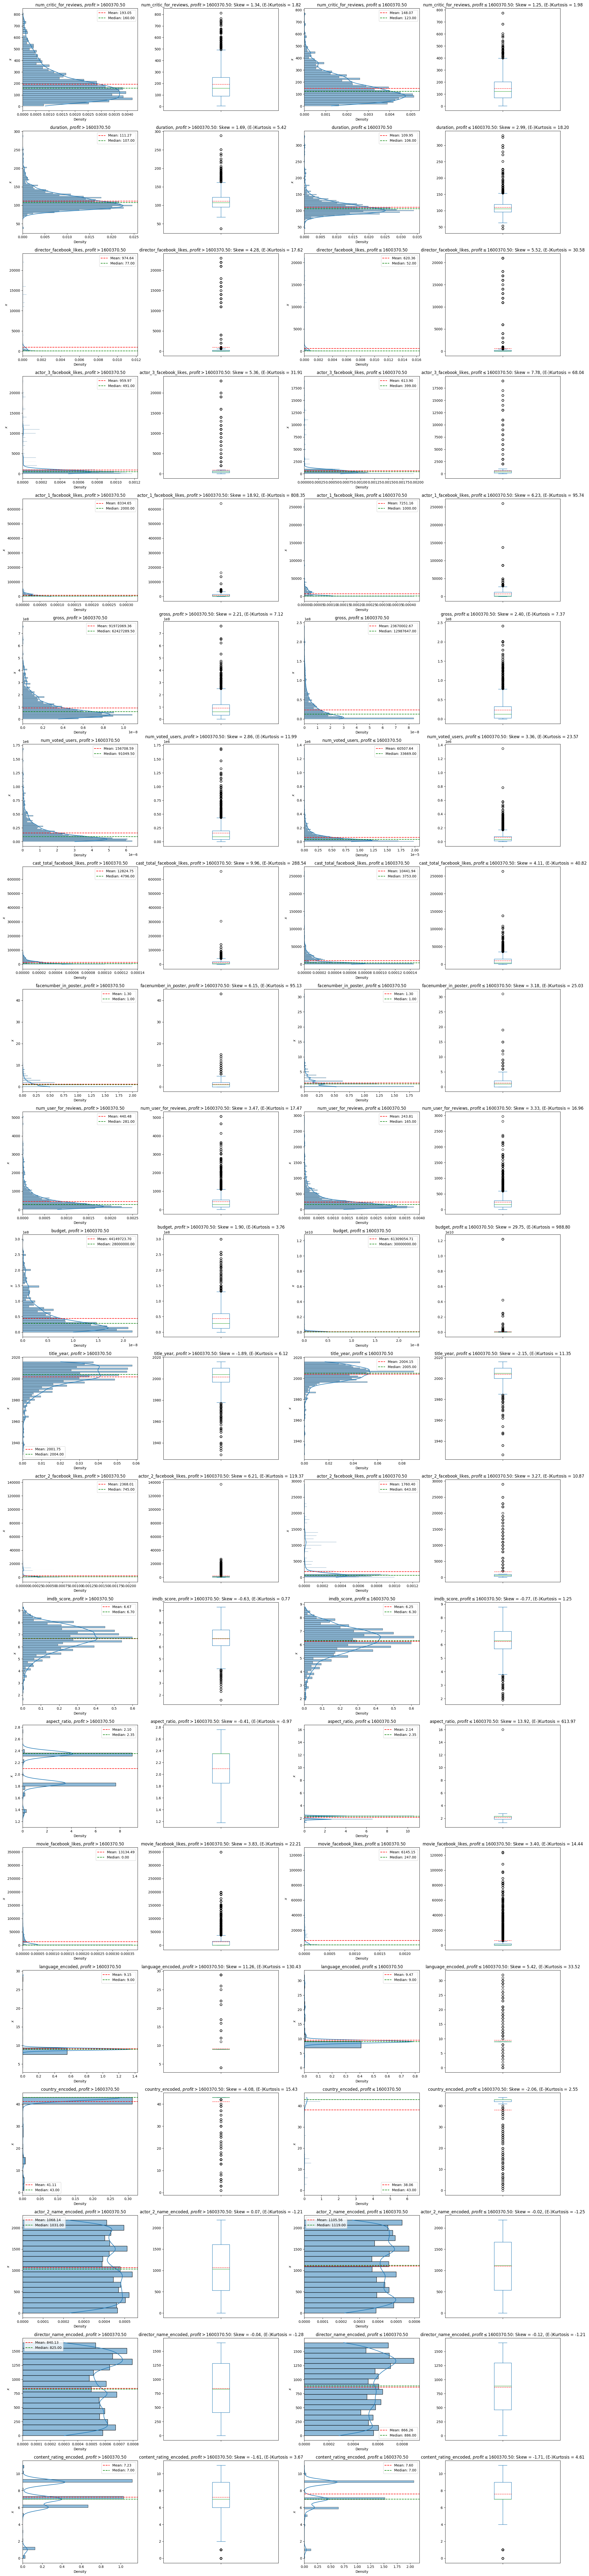

In [37]:
# Define function for plotting histograms
def plot_histogram(ax, data, column, quality_thresh, ylabel):
    comparison_operator = ">" if data is df_profit_h else "\leq"
    title = rf"{column}, $profit {comparison_operator} {quality_thresh:.2f}$"
    sns.histplot(data=data, ax=ax, y=column, stat="density", kde=True)
    mean = data[column].mean()
    median = data[column].median()
    ax.axhline(mean, ls='--', color='r', label=f'Mean: {mean:.2f}')
    ax.axhline(median, ls='--', color='g', label=f'Median: {median:.2f}')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend()

# Define function for plotting box plots
def plot_boxplot(ax, data, column, quality_thresh):
    comparison_operator = ">" if data is df_profit_h else "\leq"
    skew, kurtosis = data[column].skew(), data[column].kurtosis()
    title = rf"{column}, $profit {comparison_operator} {quality_thresh:.2f}$: Skew = {skew:.2f}, (E-)Kurtosis = {kurtosis:.2f}"
    data.plot(kind="box", y=column, ax=ax, meanline=True, showmeans=True, meanprops={"color":"r"})
    ax.set_xticklabels([""])
    ax.set_title(title)
    
# Create subplots
fig, axes = plt.subplots(nrows=len(sig_cols), ncols=4, figsize=(23, 5 * len(sig_cols)))

for idx, col in enumerate(sig_cols):
    plot_histogram(axes[idx, 0], df_profit_h, col, quality_thresh, r"$x$")
    plot_boxplot(axes[idx, 1], df_profit_h, col, quality_thresh)
    plot_histogram(axes[idx, 2], df_profit_l, col, quality_thresh, r"$x$")
    plot_boxplot(axes[idx, 3], df_profit_l, col, quality_thresh)

plt.tight_layout()
plt.show()


For skewness, the range -0.5 to 0.5 indicates symmetry.

For excess kurtosis, the range -0.5 to 0.5 is used to indicate normality.

We have observed that none of the distributions are Gaussian. To address this, we will employ bootstrapping

In [38]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=10000,tail="two"):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if tail == "two":
            if np.abs(bs_t_stat) >= np.abs(t_stat):
                count += 1
        elif tail == "less":
            if bs_t_stat <= t_stat:
                count += 1
        elif tail == "greater":
            if bs_t_stat >= t_stat:
                count += 1

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)

In [39]:
sig_mean_cols = []
dbars = [] 
for col in sig_cols:
    data_1 = df_profit_h[col].to_numpy()
    data_2 = df_profit_l[col].to_numpy()
    if np.mean(data_1) - np.mean(data_2) < 0:
        tail = "less"
    else:
        tail = "greater"
    dbar, _, p_value_bs = bootstrap_diff_means(data_1,data_2,tail=tail)
    if p_value_bs < alpha:
        print(f"Bootstrap: There is significant evidence to state that the average {col} levels for profit > 0 is different to profit <= 0 at the {100*alpha}% significance level, p-value = {p_value_bs}")
        sig_mean_cols.append(col)
        dbars.append(dbar)
    else:
        print(f"Bootstrap: There is not significant evidence to state that the average {col} levels for profit > 0 is different to profit <= 0 at the {100*alpha}% significance level, p-value = {p_value_bs}")

Bootstrap: There is significant evidence to state that the average num_critic_for_reviews levels for profit > 0 is different to profit <= 0 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is not significant evidence to state that the average duration levels for profit > 0 is different to profit <= 0 at the 0.1% significance level, p-value = 0.0015998400159984002
Bootstrap: There is significant evidence to state that the average director_facebook_likes levels for profit > 0 is different to profit <= 0 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is significant evidence to state that the average actor_3_facebook_likes levels for profit > 0 is different to profit <= 0 at the 0.1% significance level, p-value = 9.999000099990002e-05
Bootstrap: There is significant evidence to state that the average actor_1_facebook_likes levels for profit > 0 is different to profit <= 0 at the 0.1% significance level, p-value = 9.999000099

# Hypothesis Testing

#### Data

After splitting our data by each genre, the overall sample size increased from 3,722 to 11,139. Subsequently, the dataset was divided into two groups: df_profit_h and df_profit_l, consisting of 5,568 and 5,571 entries, respectively



#### Hypothesis statement

If a movie has higher imdb score on average, then the profit of that movie will be higher on average.


#### Mathematical process 1

Kolmogorov-Smirnoff was tested on the two samples to check if they come from the same distribution at the 0.1% significance level. 

\begin{align*}
\mathbf{H}_0 \quad &: \quad \text{\it the sample groups come from the same distribution} \\
\mathbf{H}_1 \quad &: \quad \text{\it the sample groups come from different distributions}
\end{align*}

With a p-value (2.866e-78) < 0.01 in the Kolmogorov-Smirnov test, we reject the null hypothesis at the 0.1% significance level. This indicates that the distribution of imdb_score for profit above its median and equal to or below the median are different.

#### Mathematicial process 2

After calculating the skewness and kurtosis, we found none of the distributions appear Gaussian.

#### Mathematicial process 3

Conduct a right-tailed bootstrap test to compare the mean IMDB scores at a 0.1% significance level, testing if higher profit correlate with higher average IMDB scores.

\begin{align*}
\mathbf{H
}_0 \quad &: \quad \mu_{h} - \mu_{l} = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_{h} - \mu_{l} > 0
\end{align*}

where $\mu_{h}$ denotes the mean of the high profit sample group and $\mu_{l}$ denotes the mean of the low profit sample group. 

With a p-value (9.999000099990002e-05) < 0.01 in the bootstrapped test, we reject the null hypothesis at the 0.1% significance level. This suggests that higher IMDb scores are associated with higher average profits.

# Recommended actions

C:\Users\user\AppData\Local\Temp\ipykernel_14056\611388910.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sort_budgeted.drop_duplicates(inplace=True,keep='first')


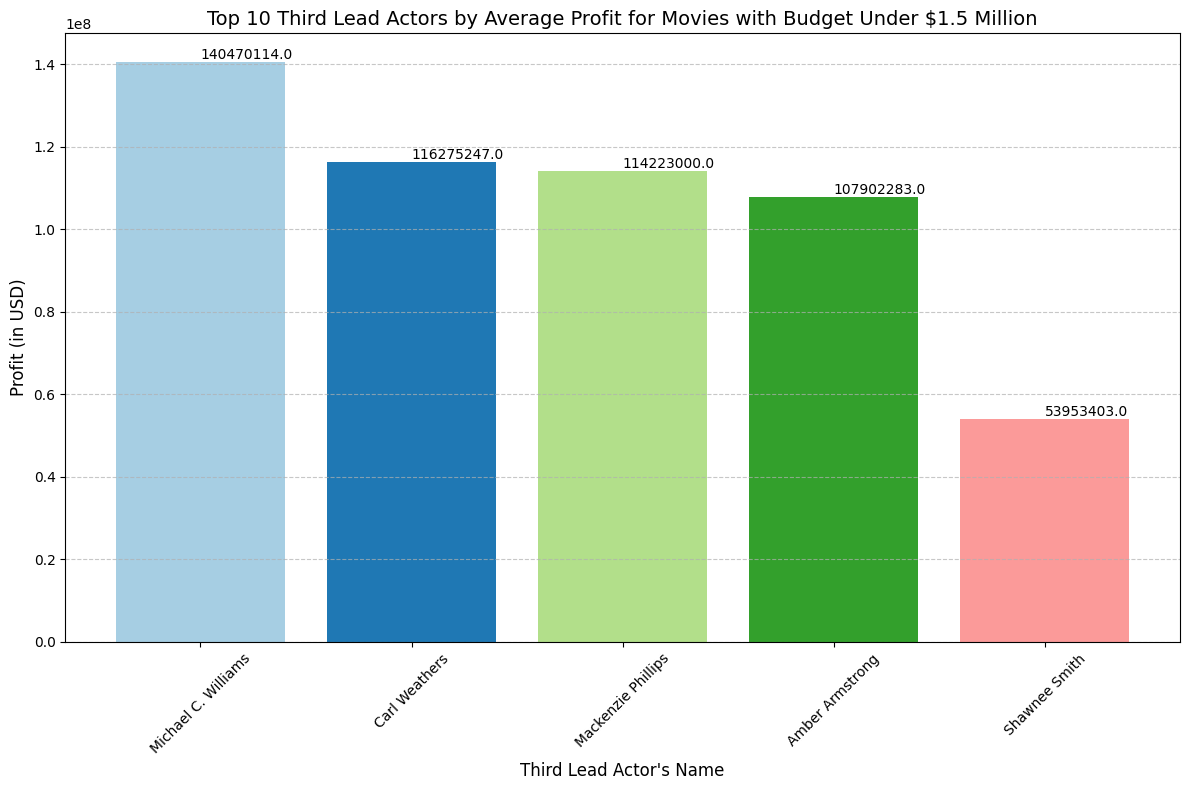

In [40]:
myfile = 'movie_metadata.csv'
dff = pd.read_csv(myfile,index_col=None)
dff.drop_duplicates(inplace=True,keep='first')
dff.dropna(inplace=True)
dff['profit'] = dff['gross'] - dff['budget']
dff['genres'] = dff['genres'].str.split('|')
dff= dff.explode('genres')
dff_exploded = dff.copy()
le = LabelEncoder()
# Fit the label encoder and transform the 'genres' column
dff_exploded['genres_encoded'] = le.fit_transform(dff_exploded['genres'])
dff_exploded['language_encoded'] = le.fit_transform(dff_exploded['language'])
dff_exploded['country_encoded'] = le.fit_transform(dff_exploded['country'])
dff_exploded['actor_1_name_encoded'] = le.fit_transform(dff_exploded['actor_1_name'])
dff_exploded['actor_2_name_encoded'] = le.fit_transform(dff_exploded['actor_2_name'])
dff_exploded['actor_3_name_encoded'] = le.fit_transform(dff_exploded['actor_3_name'])
dff_exploded['director_name_encoded'] = le.fit_transform(dff_exploded['director_name'])
dff_exploded['content_rating_encoded'] = le.fit_transform(dff_exploded['content_rating'])


dff_actor_3_name_encoded = dff_exploded[['actor_3_name','profit','budget']]
sort_budgeted = dff_actor_3_name_encoded[dff_actor_3_name_encoded['budget']<1500000]
sort_budgeted.drop_duplicates(inplace=True,keep='first')
sort_budgeted = sort_budgeted.sort_values(by='profit', ascending=False)[:5]
plt.figure(figsize=(12, 8))
bars = plt.bar(sort_budgeted['actor_3_name'], sort_budgeted['profit'], color=plt.cm.Paired.colors)
plt.xlabel('Third Lead Actor\'s Name', fontsize=12)
plt.ylabel('Profit (in USD)', fontsize=12)
plt.title('Top 10 Third Lead Actors by Average Profit for Movies with Budget Under $1.5 Million', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotates the actor names for better readability

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Adjust the positioning as necessary

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


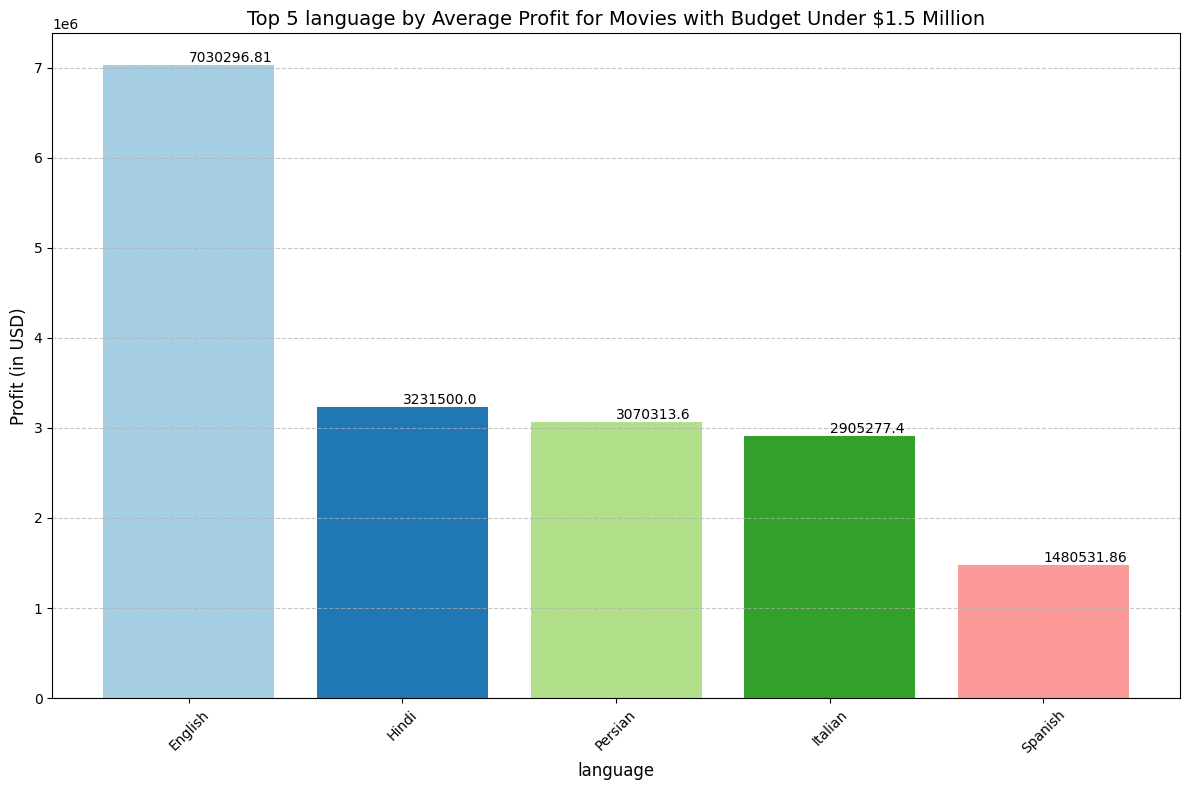

In [41]:
dff_language= dff_exploded[['language','profit','budget']]
sort_budgeted = dff_language[dff_language['budget']<1500000]
sort_budgeted_df = sort_budgeted.groupby('language')['profit'].mean()
sort_budgeted_df = pd.DataFrame(sort_budgeted_df)
sort_budgeted_df = sort_budgeted_df.sort_values(by='profit', ascending=False).reset_index()[:5]

plt.figure(figsize=(12, 8))
bars = plt.bar(sort_budgeted_df['language'], sort_budgeted_df['profit'], color=plt.cm.Paired.colors)
plt.xlabel('language', fontsize=12)
plt.ylabel('Profit (in USD)', fontsize=12)
plt.title('Top 5 language by Average Profit for Movies with Budget Under $1.5 Million', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotates the actor names for better readability

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Adjust the positioning as necessary

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

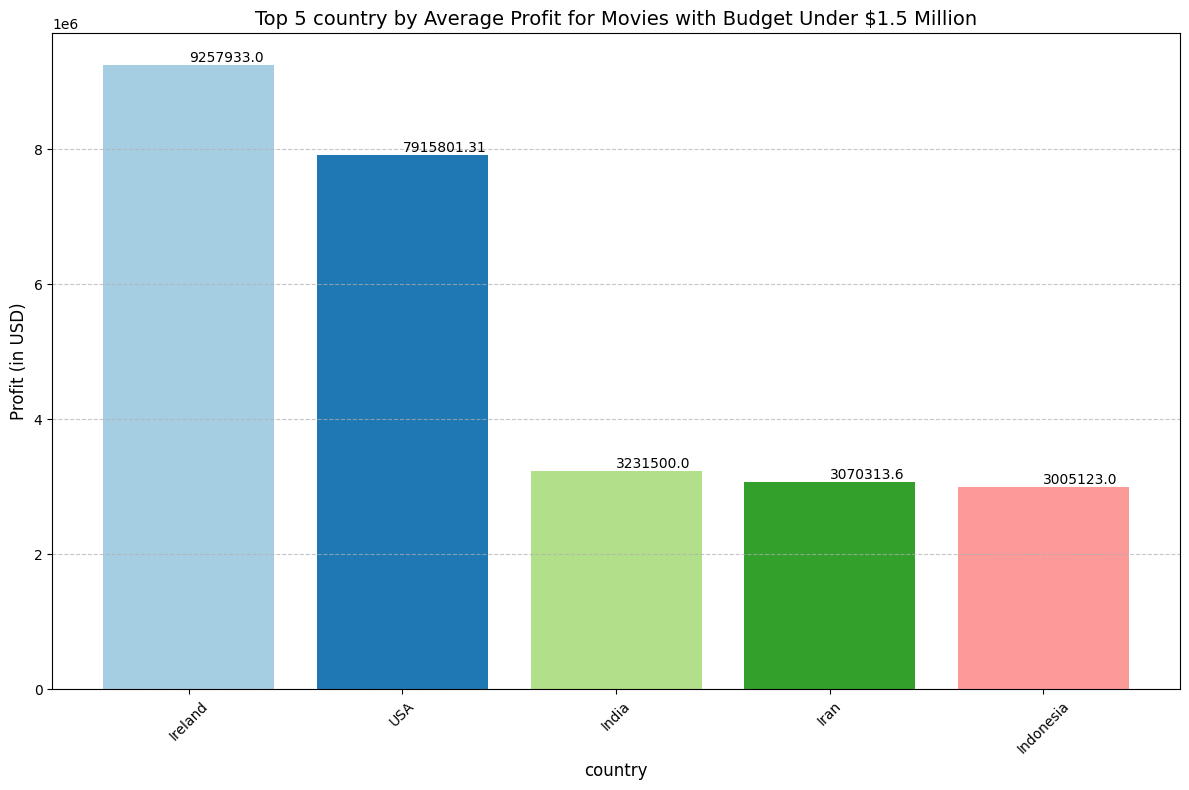

In [42]:
dff_country= dff_exploded[['country','profit','budget']]
sort_budgeted = dff_country[dff_country['budget']<1500000]
sort_budgeted_df = sort_budgeted.groupby('country')['profit'].mean()
sort_budgeted_df = pd.DataFrame(sort_budgeted_df)
sort_budgeted_df = sort_budgeted_df.sort_values(by='profit', ascending=False).reset_index()[:5]

plt.figure(figsize=(12, 8))
bars = plt.bar(sort_budgeted_df['country'], sort_budgeted_df['profit'], color=plt.cm.Paired.colors)
plt.xlabel('country', fontsize=12)
plt.ylabel('Profit (in USD)', fontsize=12)
plt.title('Top 5 country by Average Profit for Movies with Budget Under $1.5 Million', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotates the actor names for better readability

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Adjust the positioning as necessary

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

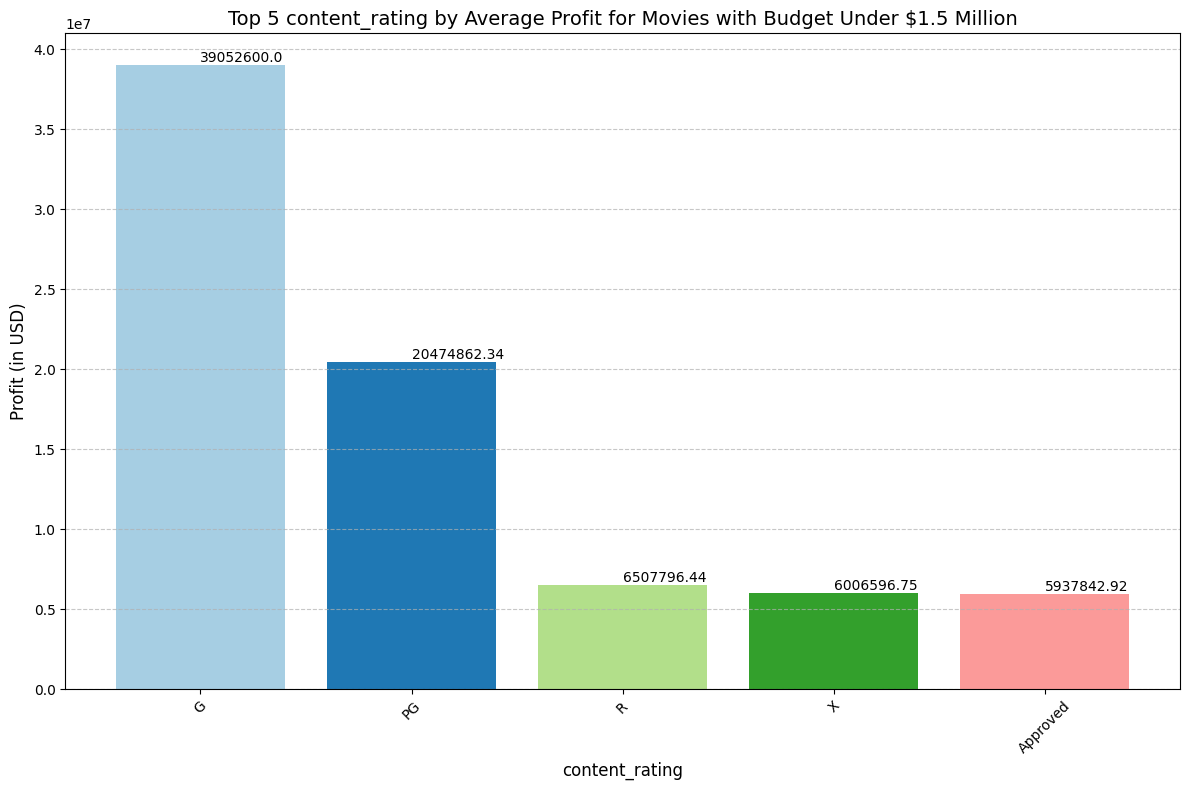

In [43]:
dff_content_rating= dff_exploded[['content_rating','profit','budget']]
sort_budgeted = dff_content_rating[dff_content_rating['budget']<1500000]
sort_budgeted_df = sort_budgeted.groupby('content_rating')['profit'].mean()
sort_budgeted_df = pd.DataFrame(sort_budgeted_df)
sort_budgeted_df = sort_budgeted_df.sort_values(by='profit', ascending=False).reset_index()[:5]

plt.figure(figsize=(12, 8))
bars = plt.bar(sort_budgeted_df['content_rating'], sort_budgeted_df['profit'], color=plt.cm.Paired.colors)
plt.xlabel('content_rating', fontsize=12)
plt.ylabel('Profit (in USD)', fontsize=12)
plt.title('Top 5 content_rating by Average Profit for Movies with Budget Under $1.5 Million', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotates the actor names for better readability

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Adjust the positioning as necessary

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary of Recommended Actions
  1. With a p-value < 0.01 in the bootstrapped test, suggesting that `actor_3_name` , `language_encoded`, and `country_encoded` are associated with higher average profits.Top five actors , languages, and countries identified for their substantial contributions to profit generation within a 1.5 million dollar budget:
     - Movie actors Options:
          - Michael C. Williams
          - Carl Weathers
          - Mackenzie Phillips
          - Amber Armstrong
          - Shawnee Smith

     - Movie Language Options:
          - English
          - Hindi
          - Persian
          - Italian
          - Spanish

     - Movie Country Options:

          - Ireland
          - USA
          - India
          - Iran
          - Indonesia

- content_rating: Rated-G movies are the most recommended one.

- Focus on boosting critic and user reviews, votes, and IMDb ratings to enhance engagement. Engage critics, solicit viewer feedback, and promote audience interaction.

- Strengthen social media marketing to improve the online presence of directors and lead actors. Increase likes and interactions on platforms like Facebook to drive profitability.

In [44]:
import json

def count_words_in_markdown_cells(ipynb_file_path):
    # Read and parse the Jupyter Notebook file
    with open(ipynb_file_path, 'r', encoding='utf-8') as file:
        notebook_content = json.load(file)

    total_word_count = 0

    # Loop through each cell in the Jupyter Notebook
    for cell in notebook_content['cells']:
        # Check if the cell is a Markdown cell
        if cell['cell_type'] == 'markdown':
            # Extract the text content of the cell
            cell_text = ''.join(cell['source'])
            # Count the words in the cell
            word_count = len(cell_text.split())
            total_word_count += word_count

    return total_word_count

# Usage
ipynb_file_path = 'Report1_outline.ipynb'
word_count = count_words_in_markdown_cells(ipynb_file_path)
print(f"Total Word Count in Markdown Cells: {word_count}")


Total Word Count in Markdown Cells: 978
